In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from customtkinter import *

In [2]:
df = pd.read_csv("Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [4]:
df.duplicated().sum()

np.int64(24)

In [5]:
df.drop_duplicates(inplace=True)

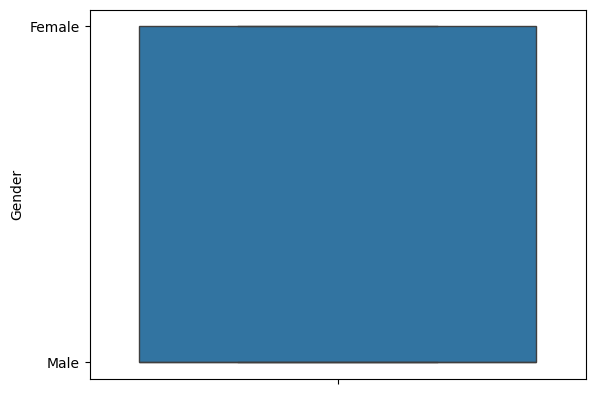

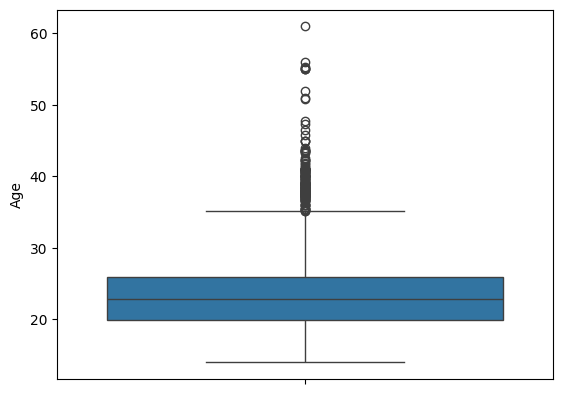

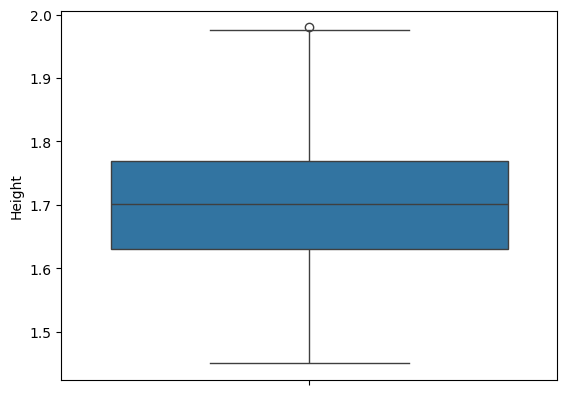

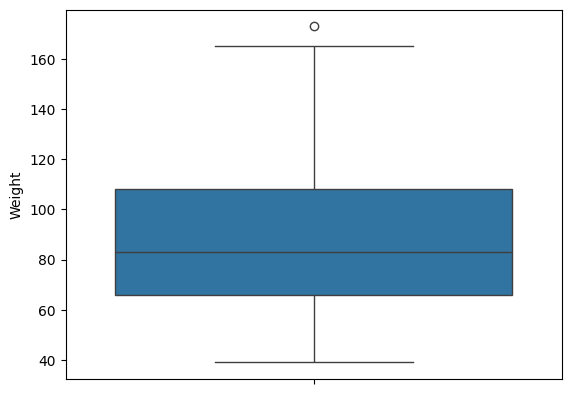

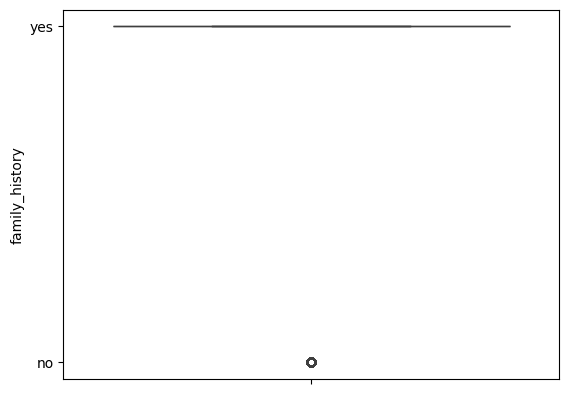

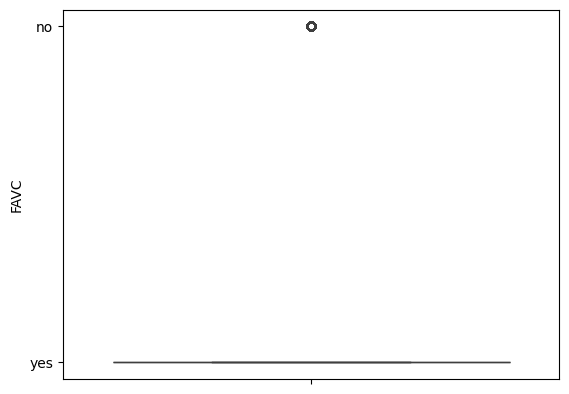

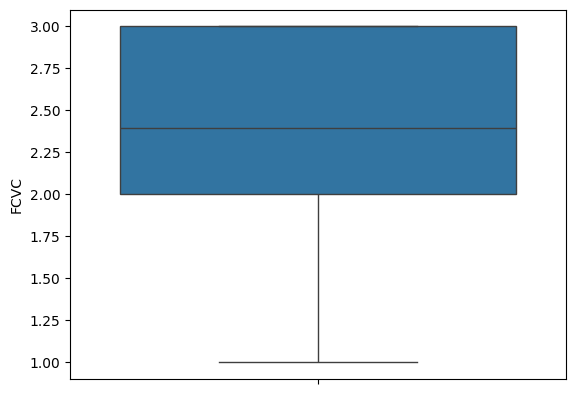

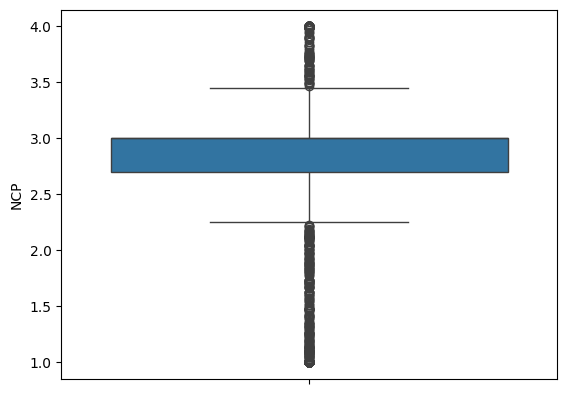

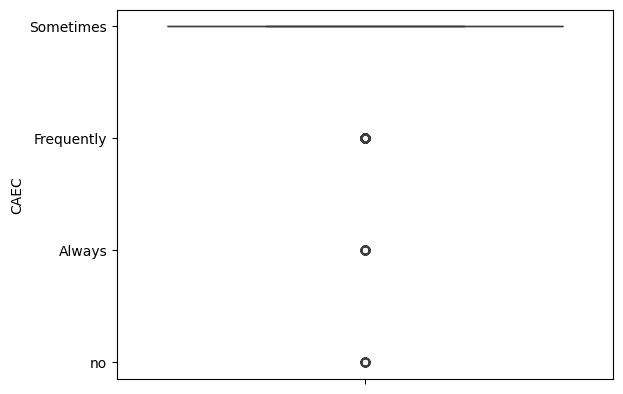

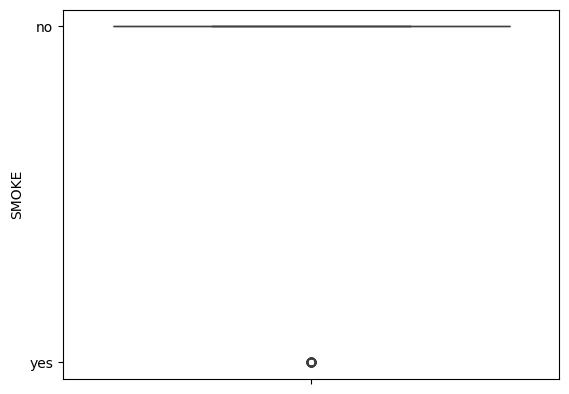

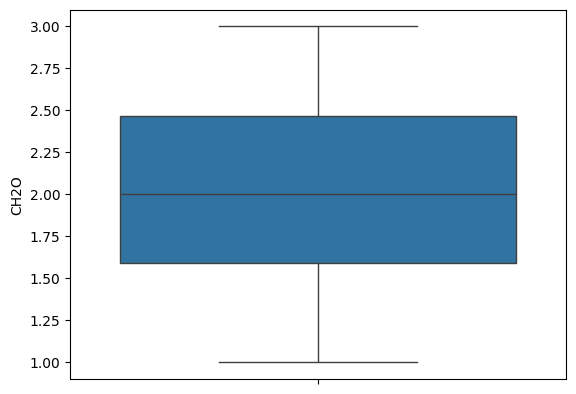

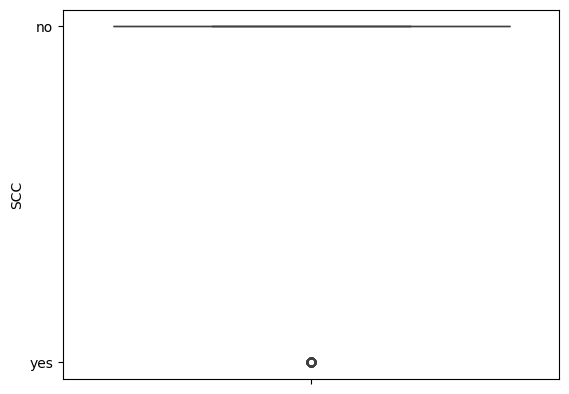

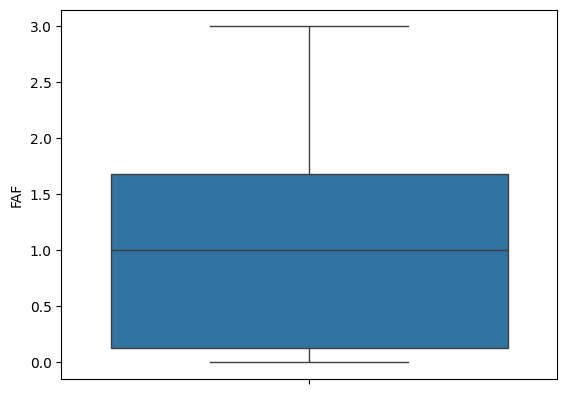

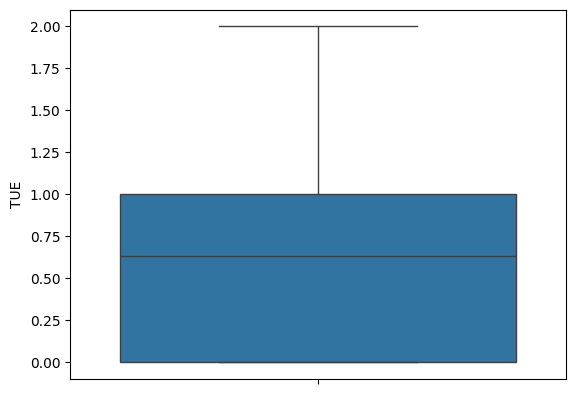

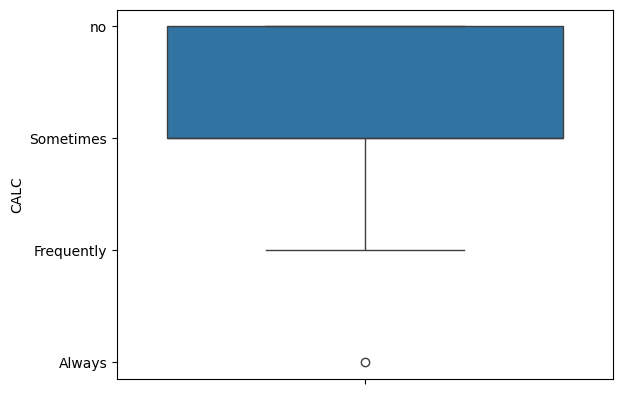

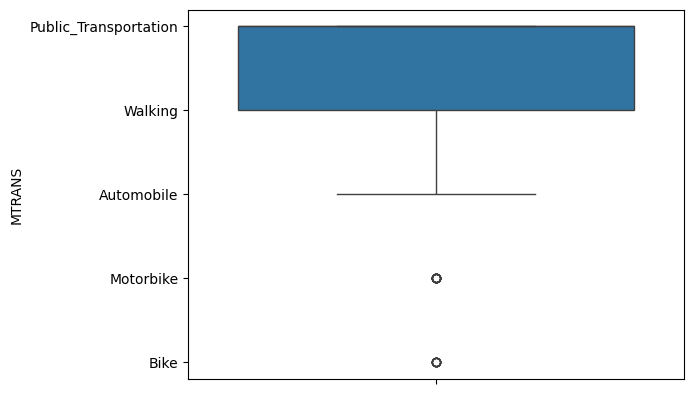

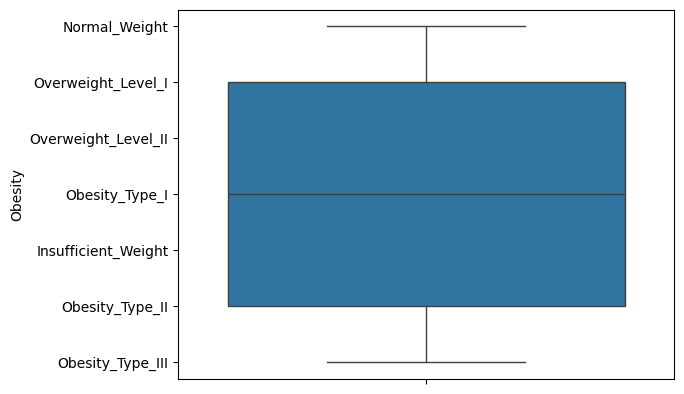

In [6]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [7]:
df['NCP'].unique()

array([3.      , 1.      , 4.      , 3.28926 , 3.995147, 1.72626 ,
       2.581015, 1.600812, 1.73762 , 1.10548 , 2.0846  , 1.894384,
       2.857787, 3.765526, 3.285167, 3.691226, 3.156153, 1.07976 ,
       3.559841, 3.891994, 3.240578, 3.904858, 3.11158 , 3.590039,
       2.057935, 3.558637, 2.000986, 3.821168, 3.897078, 3.092116,
       3.286431, 3.592415, 3.754599, 3.566082, 3.725797, 3.520555,
       3.731212, 1.259803, 1.273128, 3.304123, 3.647154, 3.300666,
       3.535016, 1.717608, 2.884479, 3.626815, 1.473088, 3.16645 ,
       3.494849, 2.99321 , 2.127797, 3.90779 , 3.699594, 3.179995,
       1.075553, 3.238258, 3.804944, 1.630846, 3.762778, 3.371832,
       2.705445, 3.34175 , 2.217651, 2.893778, 3.502604, 3.998766,
       3.193671, 1.69608 , 2.812377, 1.612747, 1.082304, 1.882158,
       2.326233, 1.989398, 1.735493, 2.974568, 3.715118, 3.489918,
       3.378859, 3.263201, 3.994588, 3.24934 , 3.087544, 1.163666,
       3.409363, 3.281391, 3.98525 , 3.207071, 3.471536, 3.488

In [8]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [9]:
mapping = {}
dictionary = {}
cat_cols = df.select_dtypes(include='object')

for col in cat_cols.columns:
    unique = df[col].unique()
    mapping = {value: idx for idx,value in enumerate(unique)}
    dictionary[col] = mapping
    df[col] = cat_cols[col].map(mapping)

In [10]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0
1,0,21.0,1.52,56.0,0,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0
2,1,23.0,1.80,77.0,0,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0
3,1,27.0,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1
4,1,22.0,1.78,89.8,1,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2


In [11]:
dictionary

{'Gender': {'Female': 0, 'Male': 1},
 'family_history': {'yes': 0, 'no': 1},
 'FAVC': {'no': 0, 'yes': 1},
 'CAEC': {'Sometimes': 0, 'Frequently': 1, 'Always': 2, 'no': 3},
 'SMOKE': {'no': 0, 'yes': 1},
 'SCC': {'no': 0, 'yes': 1},
 'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
 'MTRANS': {'Public_Transportation': 0,
  'Walking': 1,
  'Automobile': 2,
  'Motorbike': 3,
  'Bike': 4},
 'Obesity': {'Normal_Weight': 0,
  'Overweight_Level_I': 1,
  'Overweight_Level_II': 2,
  'Obesity_Type_I': 3,
  'Insufficient_Weight': 4,
  'Obesity_Type_II': 5,
  'Obesity_Type_III': 6}}

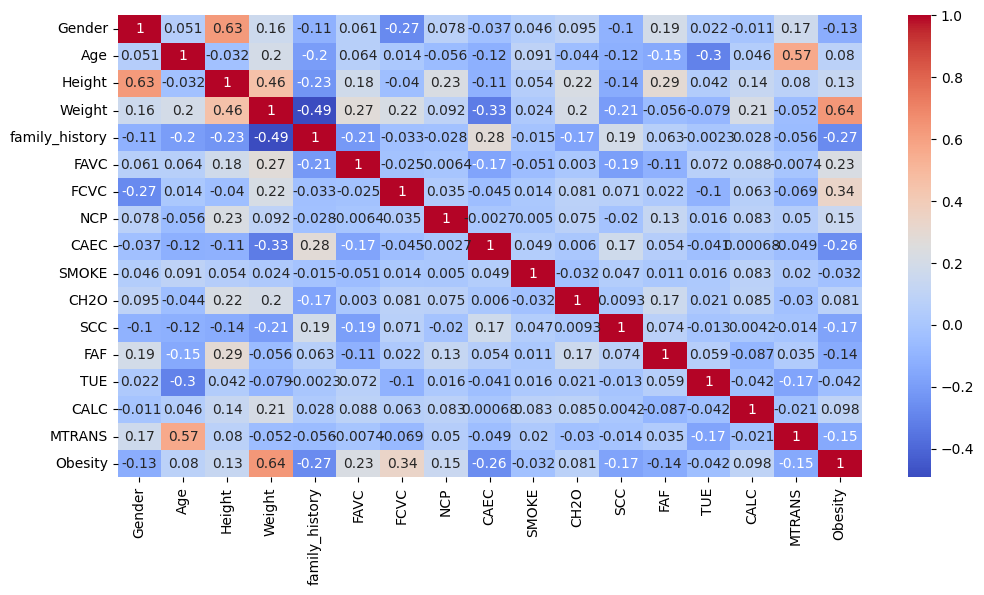

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
df = df.drop(columns=['Age', 'CALC', 'TUE', 'SMOKE', 'CH2O'])

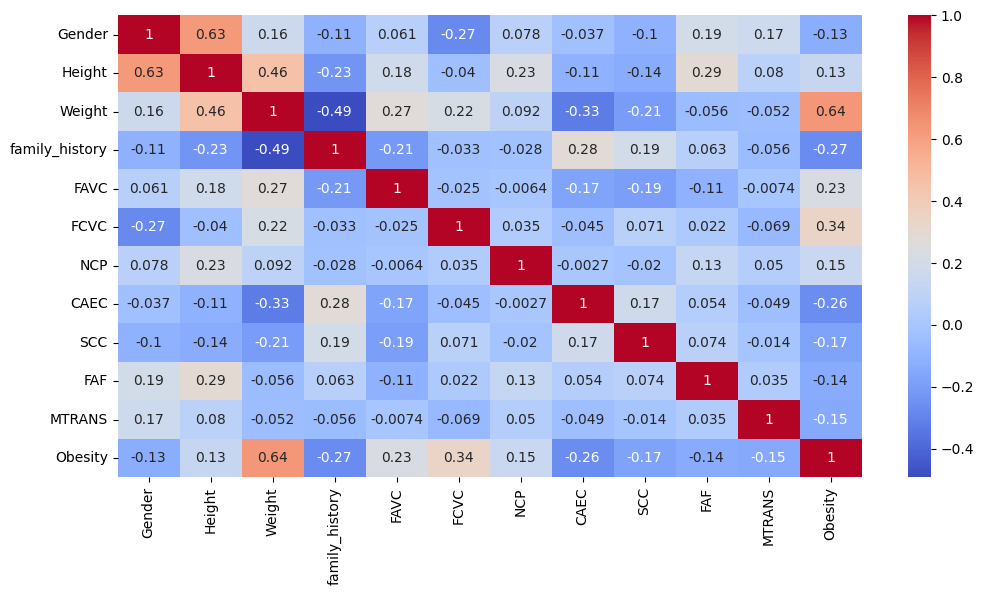

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

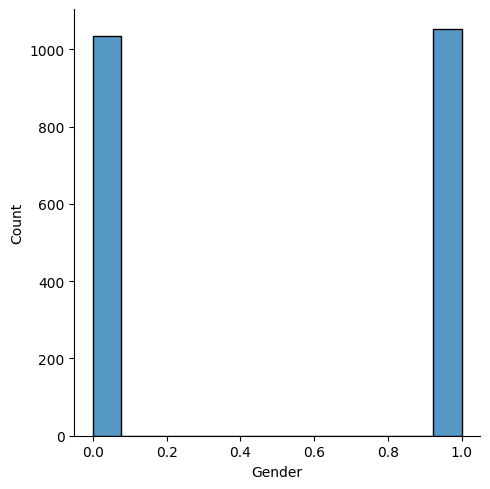

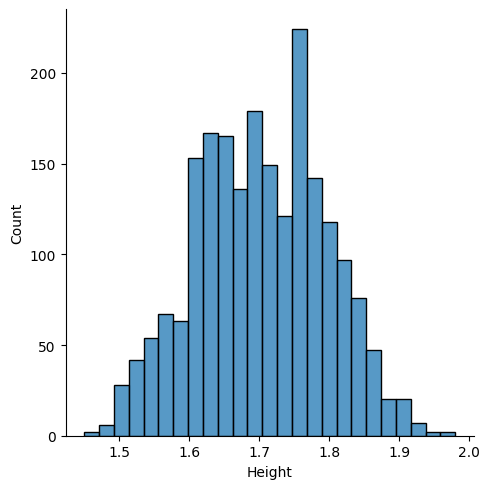

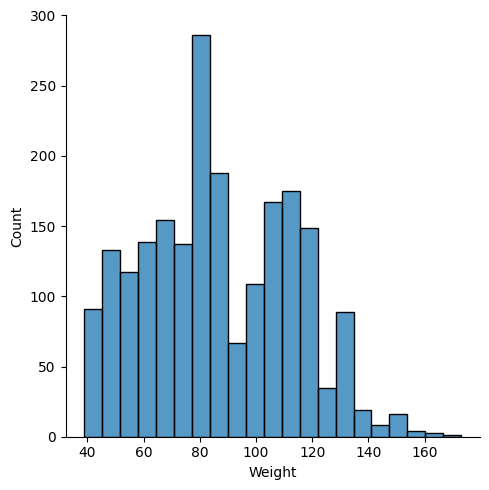

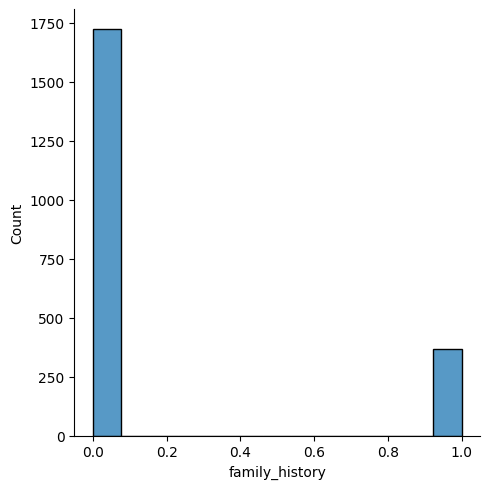

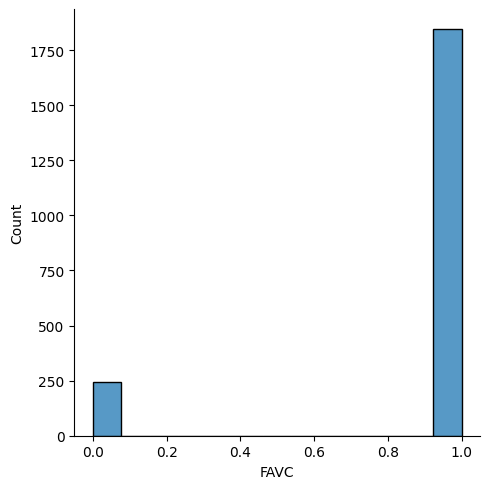

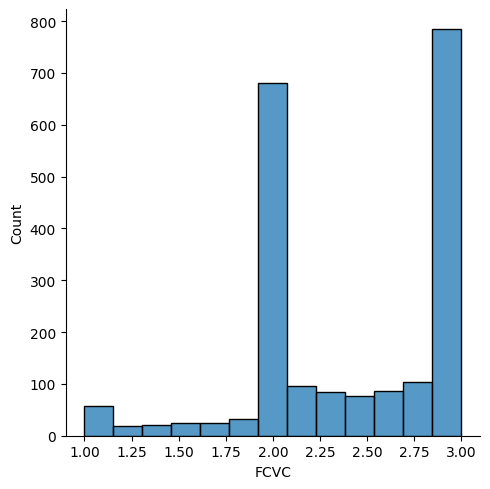

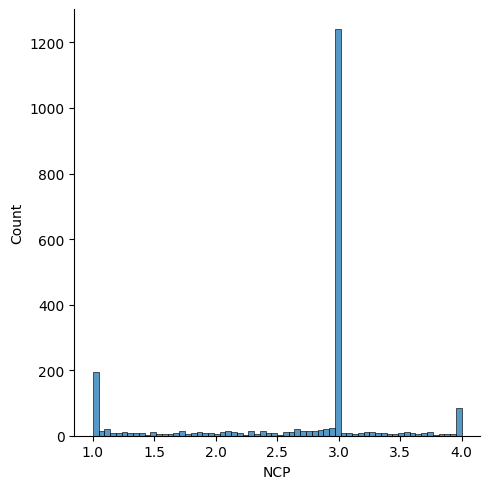

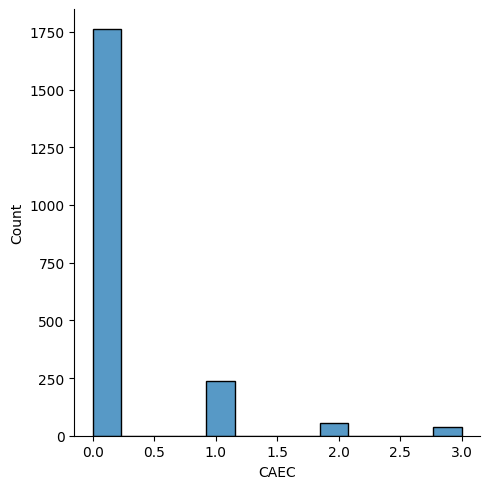

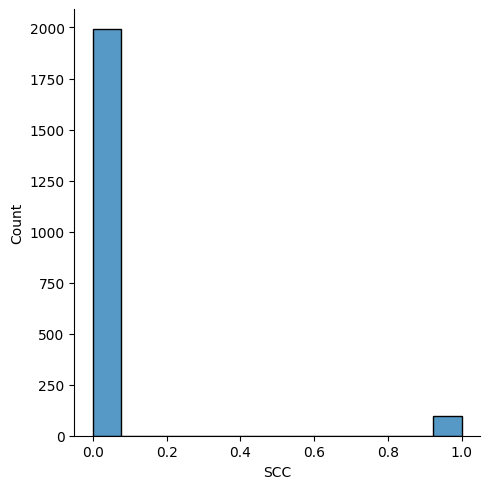

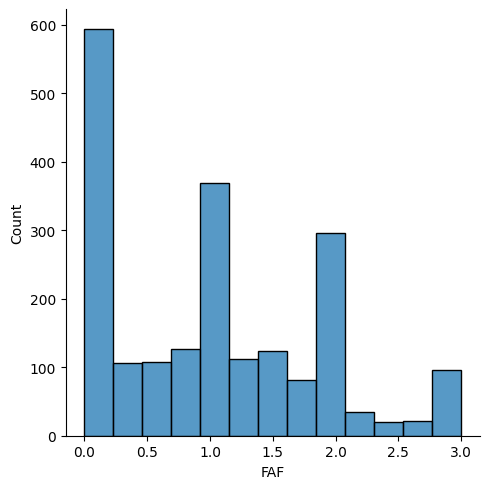

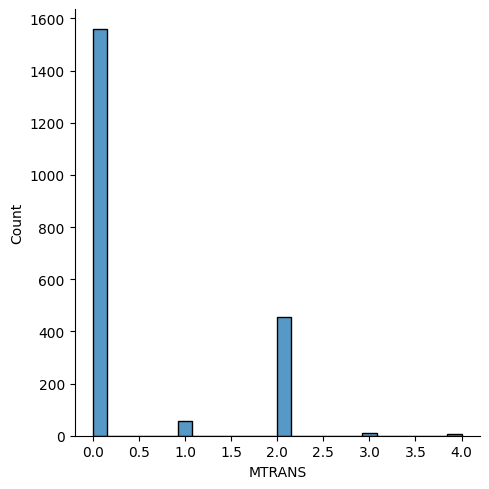

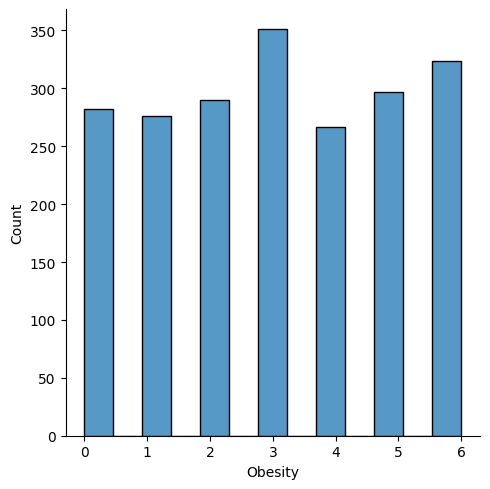

In [15]:
for col in df.columns:
    sns.displot(df[col])
    plt.show()

In [16]:
df['Obesity'].value_counts()
#   {'Normal_Weight': 0,
#   'Overweight_Level_I': 1,
#   'Overweight_Level_II': 2,
#   'Obesity_Type_I': 3,
#   'Insufficient_Weight': 4,
#   'Obesity_Type_II': 5,

#   'Obesity_Type_III': 6}

Obesity
3    351
6    324
5    297
2    290
0    282
1    276
4    267
Name: count, dtype: int64

In [17]:
def gui_call():
    baseplate = CTk()
    baseplate.geometry('670x350')
    baseplate.title('Pendeteksi obesitas')
    set_appearance_mode('dark')

    label_title = CTkLabel(master=baseplate, text='Pendeteksi obesitas manusia')
    label_title.place(relx=0.5, rely=0.03)
    
    label_age = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_age.place(relx=0.5, rely=1)
    input_age = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_age.place(relx=0.1,rely=1)
    
    label_height = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_height.place(relx=0.5, rely=1)
    input_height = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_height.place(relx=0.1,rely=1)
    
    label_weight = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_weight.place(relx=0.5, rely=1)
    input_weight = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_weight.place(relx=0.1,rely=1)
    
    label_hist = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_hist.place(relx=0.5, rely=1)
    input_hist = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_hist.place(relx=0.1,rely=1)
    
    label_favc = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_favc.place(relx=0.5, rely=1)
    input_favc = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_favc.place(relx=0.1,rely=1)
    
    label_fcvc = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_fcvc.place(relx=0.5, rely=1)
    input_fcvc = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_fcvc.place(relx=0.1,rely=1)
    
    label_ncp = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_ncp.place(relx=0.5, rely=1)
    input_ncp = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_ncp.place(relx=0.1,rely=1)
    
    label_caec = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_caec.place(relx=0.5, rely=1)
    input_caec = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_caec.place(relx=0.1,rely=1)
    
    label_scc = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_scc.place(relx=0.5, rely=1)
    input_scc = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_scc.place(relx=0.1,rely=1)
    
    label_faf = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_faf.place(relx=0.5, rely=1)
    input_faf = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_faf.place(relx=0.1,rely=1)
    
    label_mtrans = CTkLabel(master=baseplate, text='Masukkan berat badan anda disini')
    label_mtrans.place(relx=0.5, rely=1)
    input_mtrans = CTkEntry(master=baseplate, placeholder_text='Masukkan berat badan')
    input_mtrans.place(relx=0.1,rely=1)
    
    baseplate.mainloop()

In [18]:
# gui_call()